# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On arriving at Mexico Airp...
1,✅ Trip Verified | I have flown British Airwa...
2,Not Verified | We bought tickets for a Geneva-...
3,✅ Trip Verified | Appalling service with fai...
4,✅ Trip Verified | British Airways charge you f...


In [21]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

own code:

In [22]:
import re

# remove unnecessary phrases
df["reviews"] = df["reviews"].apply(lambda x: re.sub(r"(✅ Trip Verified|Not Verified)", "", x).strip())
# remove special characters
df["reviews"] = df["reviews"].apply(lambda x: re.sub(r"[^\w\s]", "", x).strip())
# remove capitals
df["reviews"] = df["reviews"].str.lower()


In [23]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

# remove any stopwords eg. is, and, the
df["reviews"] = df["reviews"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\okigu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#lemmatisation eg. running/ran/runs = run
lemmatizer = WordNetLemmatizer()
df["reviews"] = df["reviews"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\okigu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# dropping any duplicate reviews
df = df.drop_duplicates(subset="reviews").reset_index(drop=True)

# Save the cleaned data
df.to_csv("data/BA_reviews_cleaned.csv", index=False)

# print first few rows
print(df.head())

                                             reviews
0  arriving mexico airport told flight delayed ai...
1  flown british airway many year still regularly...
2  verified bought ticket genevalondon flight got...
3  appalling service failing defective fleet a380...
4  british airway charge pleasure choosing seat p...


In [29]:
from collections import Counter
from nltk.tokenize import word_tokenize

nltk.download("punkt")

# tokenise + clean the reviews
all_words = []
for review in df["reviews"]:
    tokens = word_tokenize(review.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_words.extend(tokens)

# count word freqs
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)  # 20 most common words

# display most common words
print("Most Common Words:", common_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\okigu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\okigu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Most Common Words: [('flight', 2269), ('ba', 1334), ('seat', 830), ('service', 773), ('time', 664), ('hour', 612), ('london', 481), ('airline', 471), ('crew', 457), ('british', 453), ('class', 448), ('airway', 441), ('one', 437), ('u', 435), ('food', 431), ('good', 416), ('business', 415), ('get', 404), ('staff', 397), ('would', 389)]


In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# calc sentiment scores
df = pd.read_csv("data/BA_reviews_cleaned.csv")
df["sentiment_score"] = df["reviews"].apply(lambda x: sia.polarity_scores(x)["compound"])

# label based on sentiment score
df["sentiment"] = df["sentiment_score"].apply(lambda x: "positive" if x > 0.05 else ("negative" if x < -0.05 else "neutral"))
df.to_csv("data/BA_reviews_with_sentiment.csv", index=False)
print(df["sentiment"].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\okigu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


positive    536
negative    445
neutral      19
Name: sentiment, dtype: int64


In [32]:
from nltk import ngrams

# tokenise and generate bigrams and trigrams
bigram_freq = Counter()
trigram_freq = Counter()

for review in df["reviews"]:
    tokens = word_tokenize(review.lower())  # tokenise
    bigrams = ngrams(tokens, 2)  # bigrams
    trigrams = ngrams(tokens, 3)  # trigrams
    
    bigram_freq.update(bigrams)  # update bigram frequency
    trigram_freq.update(trigrams)  # update trigram frequency

# most common bigrams and trigrams
common_bigrams = bigram_freq.most_common(20)
common_trigrams = trigram_freq.most_common(20)

# print most common bigrams + trigrams
print("Most Common Bigrams:", common_bigrams)
print("Most Common Trigrams:", common_trigrams)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\okigu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most Common Bigrams: [(('british', 'airway'), 427), (('business', 'class'), 316), (('customer', 'service'), 229), (('cabin', 'crew'), 171), (('return', 'flight'), 95), (('connecting', 'flight'), 93), (('london', 'heathrow'), 80), (('flight', 'cancelled'), 75), (('flight', 'delayed'), 64), (('hour', 'flight'), 62), (('premium', 'economy'), 61), (('club', 'world'), 61), (('2', 'hour'), 58), (('club', 'europe'), 58), (('even', 'though'), 52), (('flight', 'london'), 52), (('flight', 'attendant'), 50), (('cancelled', 'flight'), 49), (('can', 'not'), 48), (('next', 'day'), 48)]
Most Common Trigrams: [(('business', 'class', 'seat'), 28), (('ba', 'customer', 'service'), 27), (('fly', 'british', 'airway'), 19), (('missed', 'connecting', 'flight'), 18), (('business', 'class', 'passenger'), 18), (('business', 'class', 'ticket'), 17), (('ba', 'business', 'class'), 16), (('flight', 'british', 'airway'), 16), (('british', 'airway', 'flight'), 14), (('experience', 'british', 'airway'), 13), (('new', 

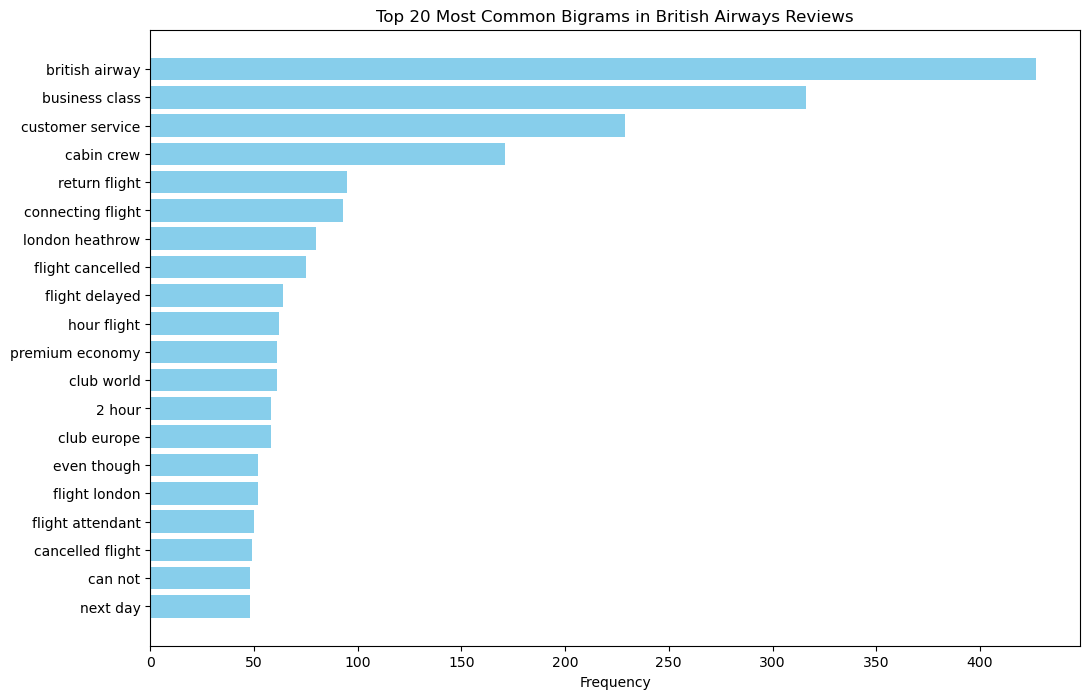

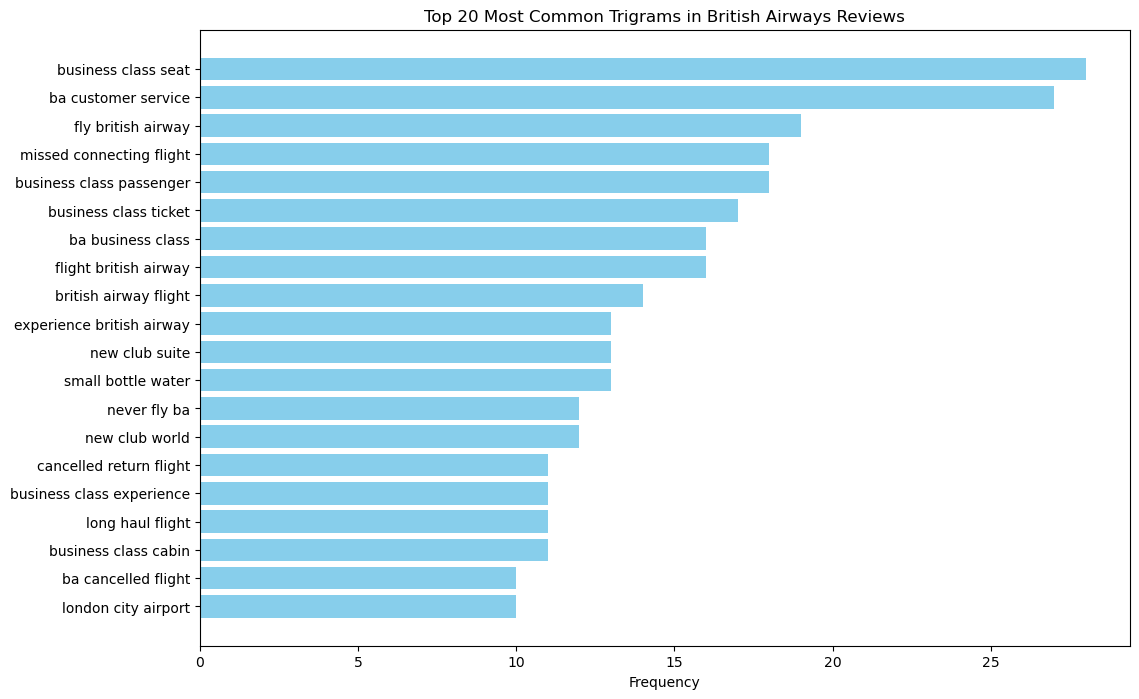

In [33]:
import matplotlib.pyplot as plt

# bigram / trigram frequencies
def plot_frequencies(frequencies, title):
    labels, counts = zip(*frequencies)
    labels = [' '.join(label) for label in labels]  # join to strings
    
    plt.figure(figsize=(12, 8))
    plt.barh(labels, counts, color='skyblue')
    plt.xlabel("Frequency")
    plt.title(title)
    plt.gca().invert_yaxis()  # show highest freq at top
    plt.show()

# plot frequencies
plot_frequencies(common_bigrams, "Top 20 Most Common Bigrams in British Airways Reviews")
plot_frequencies(common_trigrams, "Top 20 Most Common Trigrams in British Airways Reviews")
